In [1]:
import astropy as astro
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [12]:
cepheids = np.genfromtxt('cepheids_proc.txt',skip_header=1)
period = cepheids[:,2]
parallax = cepheids[:,3]
vmag = cepheids[:,4]
bv = cepheids[:,5]
ebv = cepheids[:,6]
print(ebv[130])

0.2


In [4]:
intbv = bv - ebv
def teff(bvsub):
    effective_temp = 6050*np.exp(-1*((bvsub-0.45)/(3.0))**0.75)
    return effective_temp
team = teff(intbv)
print(team)

[5087.03331829 5332.44759525 5501.83504951 5532.36589382 5133.26292522
 4832.11286406 4976.50873709 5332.44759525 5563.71514108 5563.71514108
 4735.1985631  5699.37851747 5442.94974091 5359.26769543 5332.44759525
 4852.08355047 5254.77484435 5563.71514108 4812.34504305 5205.07519329
 5442.94974091 5563.71514108 5817.20860735 5042.00037784 5359.26769543
 5332.44759525 4892.65652003 5442.94974091 5663.64972415 5472.05007243
 5595.96999393 5414.48173484 5736.64940803 5472.05007243 5280.22712618
 5180.78952283 5472.05007243 5563.71514108 5386.6008572  4754.20622073
 5472.05007243 5736.64940803 5442.94974091 5532.36589382 5332.44759525
 5205.07519329 4754.20622073 5629.23711613 5042.00037784 5629.23711613
 4519.93156742 5414.48173484 4697.71424341 5472.05007243 5156.85719795
 5595.96999393 5663.64972415 5133.26292522 5109.99263003 5472.05007243
 4998.07765629 5180.78952283 5472.05007243 5359.26769543 5736.64940803
 5442.94974091 4679.22930385 5414.48173484 5442.94974091 5663.64972415
 5332.

In [19]:
def mbol(mag,temp):
    value = mag + 1/1000*np.exp(27500/temp)
    return value
apparent = mbol(vmag,team)
absolute = apparent - 5*np.log10(1/(parallax*0.001)) + 5
lumens = 10**(0.4*(4.74-absolute))
print(lumens)

[1126.43309278  167.44420379  333.00971584  557.23311    2074.18074029
 1207.16189886 1102.86146075 1162.80697076  610.7294483   457.40434455
  443.34321277 1184.96178939  194.52878691  963.49314929 1159.70254224
  777.74860804  260.88403978  150.30599562 5537.2354445   877.90760646
  208.78408002  605.61311434  640.82438167 1149.8902224   232.22436779
  257.69950024  621.17925436  137.5460557   495.07945028  484.34330519
  681.38588128  456.70575544  948.61306266  445.13218848 1577.06157078
  520.02838745  523.84039977  208.69422411  980.43836724 1178.14798373
  942.15114133  978.8954707   352.18501     505.44788578  276.64349336
 1353.50872695 7749.26532247  379.43950583  815.72351041 1224.92471838
  246.37577706  735.05680515 2301.55883314  326.15470349 1034.04285628
  113.8269943    67.19745828 1671.8525909  1885.60769564  156.72000607
 3089.87782507  636.89990077  214.82239941  896.59218029 1061.14191749
 1382.75078347 2757.23746705  209.41212083 1023.9509666   934.19489791
  198.

In [27]:
mass = (lumens/(10**0.72578))**(1/3.35)
print(mass)

[4.94659199 2.80021308 3.43812343 4.00923733 5.93543722 5.04985909
 4.91546339 4.99374265 4.12046215 3.77979931 3.74473349 5.02195641
 2.92838399 4.7211776  4.98975917 4.42880278 3.1965159  2.71139585
 7.95701444 4.59188169 2.99086102 4.1101276  4.1800531  4.977119
 3.08738212 3.18481822 4.14138262 2.64053533 3.87016803 3.84492217
 4.25733914 3.77807515 4.69929347 3.74923778 5.46928985 3.92738609
 3.9359579  2.99047673 4.74581207 5.01331885 4.6897149  4.74358147
 3.49606391 3.89418726 3.25297507 5.22533032 8.79675601 3.57472429
 4.49227735 5.07192654 3.14238293 4.35479217 6.12262886 3.41684257
 4.82182566 2.49547838 2.1321989  5.5654195  5.76893868 2.7454294
 6.6853289  4.17239511 3.01642413 4.62083945 4.85920493 5.25877694
 6.461844   2.9935438  4.80772976 4.67785776 2.94820041 3.56443349
 4.11952432 3.04138659 3.64050603 4.32991751 5.14736165 2.83949657
 4.68169903 2.74101233 5.7489776  3.27892566 4.04138517 4.18414308
 2.53391453 5.94990653 4.27967538 4.03947713 5.89352022 4.0229155

In [29]:
expected = 1/(team**3)*np.sqrt(1/(6.67e-11*1.9891e30*mass)*((lumens*3.8515e26)/(4*np.pi*5.67e-8))**(3/2))

Text(0.5, 1.0, '$\\Pi$ vs Observed Periods')

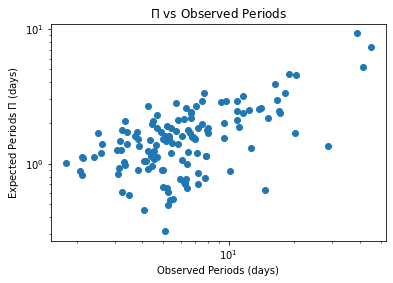

In [36]:
expecteds = expected/86400
plt.scatter(period,expecteds)
plt.semilogx()
plt.semilogy()
plt.xlabel('Observed Periods (days)')
plt.ylabel(r'Expected Periods $\Pi$ (days)')
plt.title(r'$\Pi$ vs Observed Periods')

In [42]:
this = np.linspace(1000,30000,131)
logpi = np.log10(10**(-.18)*this**0.09)
loglum = np.log10(this)

Text(0, 0.5, 'log($\\frac{\\Pi _{RE}}{\\Pi _{BE}}$)')

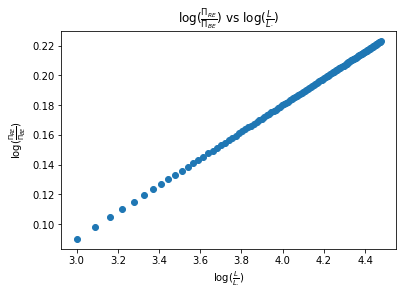

In [45]:
plt.scatter(loglum,logpi)
plt.title(r'log($\frac{\Pi _{RE}}{\Pi _{BE}}$) vs log($\frac{L}{L_{\cdot}}$)')
plt.xlabel(r'log($\frac{L}{L_{\cdot}}$)')
plt.ylabel(r'log($\frac{\Pi _{RE}}{\Pi _{BE}}$)')

In [60]:
print(np.max(team),np.min(team))
that = np.linspace(4500,6050,131)
logbe = 10**(-20*(np.log10(that)-3.91))
logre = 10**(-12.5*(np.log10(that)-3.97))

6049.999999998293 4519.931567423517


Text(0.5, 1.0, 'log(L) vs log(T)')

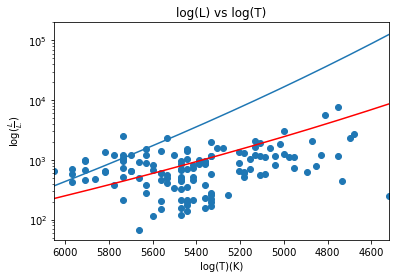

In [64]:
plt.scatter(team,lumens)
plt.plot(that,logre,color='r')
plt.plot(that,logbe)
plt.xlim(6049.9999,4519.931)
plt.semilogy()
# plt.semilogx()
plt.xlabel('log(T)(K)')
plt.ylabel(r'log($\frac{L}{L_{\cdot}}$)')
plt.title('log(L) vs log(T)')

In [71]:
death = list(lumens)
#print(death.index(431.91))
print(death.index(517.33691682))

ValueError: 517.33691682 is not in list